# Customer Segmentation with RFM Analysis

# by Saeed Dehghani

In [1]:
import pandas as pd
pd.options.display.float_format = "{:.3f}".format
import matplotlib.pyplot as plt
import seaborn as sns

- Company - store online retail


- Products for selling 


- Customers - Most are individuals


- Transactions Period - 21 March 2019 - 22 Jul 2019 (About 4 months)

### Read data and Data Inspection

In [2]:
data=pd.read_csv("Customer_seg.csv")

In [3]:
data.head()

,order_id,created_ts,shamsy_date,customer_id,total_purchase
0,5c92a3d9a7b11b0001e4ec46,3/21/2019 0:04,1398-Farvardin-1,5bf1092b24aa9a000135ac7c,240000.000
1,5c92af8024aa9a00015b536d,3/21/2019 0:54,1398-Farvardin-1,58d2fe9b46e0fb0001e432c0,620000.000
2,5c930b0ea7b11b0001e4f07e,3/21/2019 7:24,1398-Farvardin-1,5c85f140a7b11b0001e65ec1,320000.000
3,5c93157324aa9a00015b5750,3/21/2019 8:09,1398-Farvardin-1,59c52fe152faff00014e4932,220000.000
4,5c93250024aa9a00015b5884,3/21/2019 9:15,1398-Farvardin-1,58eba26fd601800001b98a34,360000.000


In [4]:
data.tail()

,order_id,created_ts,shamsy_date,customer_id,total_purchase
40532,5d35fd03b2cf38d2d17b11c9,7/22/2019 22:44,1398-Tir-31,58d2972b46e0fb0001e42133,280000.000
40533,5d35fe44ec2c893461deb4e0,7/22/2019 22:49,1398-Tir-31,597009a6c9e77c00018c27d9,300000.000
40534,5d35ff28b2cf38d2d17b1228,7/22/2019 22:53,1398-Tir-31,59222bce52faff00016c59cc,180000.000
40535,5d360499b2cf38d2d17b12f6,7/22/2019 23:16,1398-Tir-31,5d19f78ab2cf38e5e4deddd6,180000.000
40536,5d360b2eec2c893461deb667,7/22/2019 23:44,1398-Tir-31,5c46e8fe24aa9a00019af009,180000.000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40537 entries, 0 to 40536
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        40537 non-null  object 
 1   created_ts      40537 non-null  object 
 2   shamsy_date     40537 non-null  object 
 3   customer_id     40537 non-null  object 
 4   total_purchase  40537 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.5+ MB


In [6]:
data.shape

(40537, 5)

In [7]:
data.describe()

,total_purchase
count,40537.000
mean,348802.329
std,141445.039
min,80000.000
25%,260000.000
50%,320000.000
75%,420000.000
max,3200000.000


In [8]:
print('Duplicate entries: {}'.format(data.duplicated().sum()))
print('{}% rows are duplicate.'.format(round((data.duplicated().sum()/data.shape[0])*100),2))

Duplicate entries: 0
0% rows are duplicate.


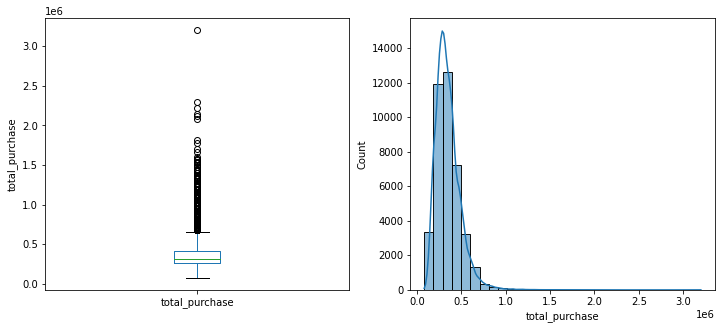

In [9]:
for var in ["total_purchase"]:
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    fig = data.boxplot(column=var,grid=False)
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig=sns.histplot(data[var], kde=True,bins=30)
    fig.set_xlabel(var)

    plt.show()

- high skewed distribution with outliers

### daily demand plot

In [10]:
data["created_ts"] = pd.to_datetime(data["created_ts"])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40537 entries, 0 to 40536
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        40537 non-null  object        
 1   created_ts      40537 non-null  datetime64[ns]
 2   shamsy_date     40537 non-null  object        
 3   customer_id     40537 non-null  object        
 4   total_purchase  40537 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.5+ MB


In [12]:
data["date"] = data["created_ts"].dt.date

In [13]:
data.insert(loc=6, column="month", value=data["created_ts"].dt.month)

# +1 to make Monday=1.....until Sunday=7
data.insert(loc=7, column="day", value=(data["created_ts"].dt.dayofweek)+1)


data.insert(loc=8, column="hour", value=data["created_ts"].dt.hour)

In [14]:
data.head()

,order_id,created_ts,shamsy_date,customer_id,total_purchase,date,month,day,hour
0,5c92a3d9a7b11b0001e4ec46,2019-03-21 00:04:00,1398-Farvardin-1,5bf1092b24aa9a000135ac7c,240000.000,2019-03-21,3,4,0
1,5c92af8024aa9a00015b536d,2019-03-21 00:54:00,1398-Farvardin-1,58d2fe9b46e0fb0001e432c0,620000.000,2019-03-21,3,4,0
2,5c930b0ea7b11b0001e4f07e,2019-03-21 07:24:00,1398-Farvardin-1,5c85f140a7b11b0001e65ec1,320000.000,2019-03-21,3,4,7
3,5c93157324aa9a00015b5750,2019-03-21 08:09:00,1398-Farvardin-1,59c52fe152faff00014e4932,220000.000,2019-03-21,3,4,8
4,5c93250024aa9a00015b5884,2019-03-21 09:15:00,1398-Farvardin-1,58eba26fd601800001b98a34,360000.000,2019-03-21,3,4,9


In [15]:
daily_demand = data.groupby(by = ["date"])["order_id"].count()

In [16]:
daily_demand.head()

date
2019-03-21    33
2019-03-22    21
2019-03-23    38
2019-03-24    27
2019-03-25    73
Name: order_id, dtype: int64

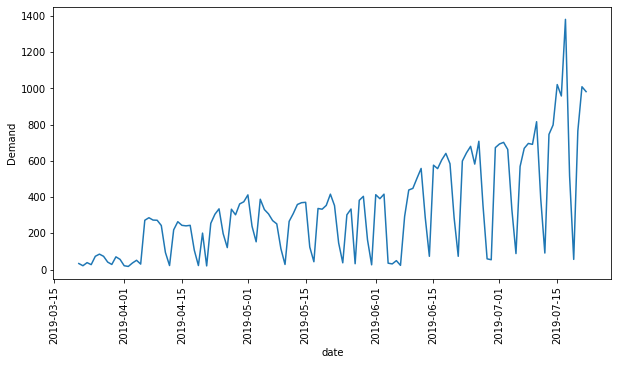

In [17]:
plt.figure(figsize=(10,5))
daily_demand.plot()
plt.xticks(rotation = 90) 
plt.ylabel("Demand")
plt.show()

### How many orders (per month)?

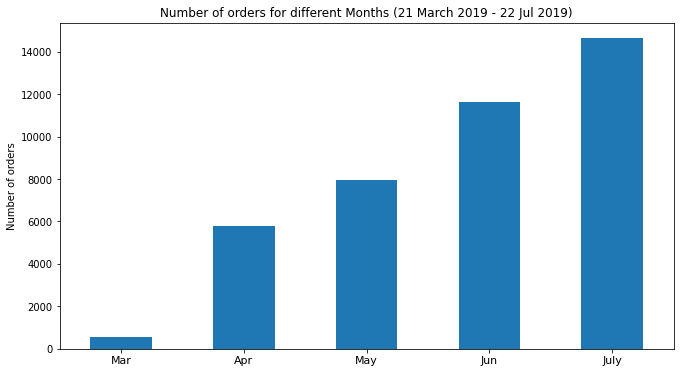

In [18]:
ax = data.groupby("order_id")["month"].unique().value_counts().sort_index().plot(kind="bar",figsize=(11,6))
ax.set_ylabel("Number of orders")
ax.set_title("Number of orders for different Months (21 March 2019 - 22 Jul 2019)")
ax.set_xticklabels(("Mar","Apr","May","Jun","July"),rotation="horizontal", fontsize=11)
plt.show()

### How many orders(per day)?

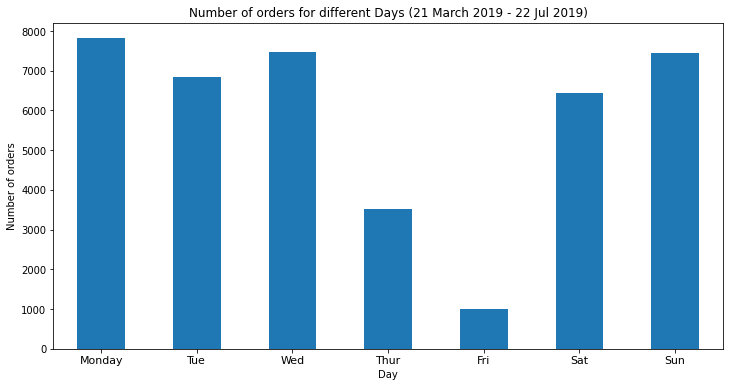

In [19]:
ax = data.groupby("order_id")["day"].unique().value_counts().sort_index().plot(kind="bar",figsize=(12,6))
ax.set_xlabel("Day")
ax.set_ylabel("Number of orders")
ax.set_title("Number of orders for different Days (21 March 2019 - 22 Jul 2019)")
ax.set_xticklabels(("Monday","Tue","Wed","Thur","Fri","Sat","Sun"), rotation="horizontal",fontsize=11)
plt.show()

### How many orders (per hour)?

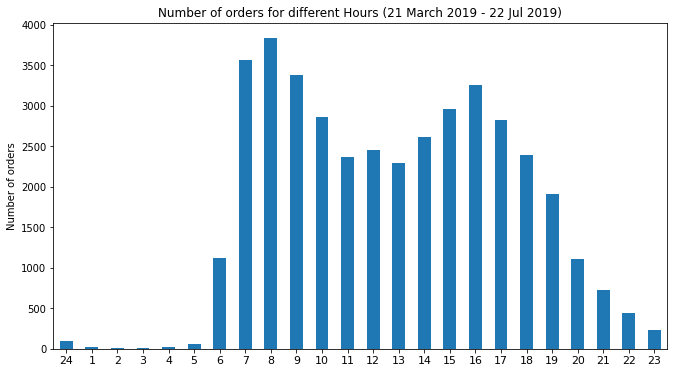

In [20]:
ax = data.groupby("order_id")["hour"].unique().value_counts().sort_index().plot(kind="bar",figsize=(11,6))
ax.set_ylabel("Number of orders")
ax.set_title("Number of orders for different Hours (21 March 2019 - 22 Jul 2019)")
ax.set_xticklabels(("24","1","2","3","4","5","6","7","8","9","10","11","12",
                   "13","14","15","16","17","18","19","20","21","22","23"),rotation="horizontal", fontsize=11)
plt.show()

### Create RFM Features

#### Recency

In [21]:
print("Min:{}; Max:{}".format(min(data["date"]),max(data["date"])))

Min:2019-03-21; Max:2019-07-22


In [22]:
snapshot = pd.to_datetime("2019-07-23").date()

In [23]:
r_date = snapshot - data["date"]

In [24]:
r_date

0       124 days
1       124 days
2       124 days
3       124 days
4       124 days
          ...   
40532     1 days
40533     1 days
40534     1 days
40535     1 days
40536     1 days
Name: date, Length: 40537, dtype: timedelta64[ns]

In [25]:
data["r_date"] = r_date.dt.days
data

,order_id,created_ts,shamsy_date,customer_id,total_purchase,date,month,day,hour,r_date
0,5c92a3d9a7b11b0001e4ec46,2019-03-21 00:04:00,1398-Farvardin-1,5bf1092b24aa9a000135ac7c,240000.000,2019-03-21,3,4,0,124
1,5c92af8024aa9a00015b536d,2019-03-21 00:54:00,1398-Farvardin-1,58d2fe9b46e0fb0001e432c0,620000.000,2019-03-21,3,4,0,124
2,5c930b0ea7b11b0001e4f07e,2019-03-21 07:24:00,1398-Farvardin-1,5c85f140a7b11b0001e65ec1,320000.000,2019-03-21,3,4,7,124
3,5c93157324aa9a00015b5750,2019-03-21 08:09:00,1398-Farvardin-1,59c52fe152faff00014e4932,220000.000,2019-03-21,3,4,8,124
4,5c93250024aa9a00015b5884,2019-03-21 09:15:00,1398-Farvardin-1,58eba26fd601800001b98a34,360000.000,2019-03-21,3,4,9,124
...,...,...,...,...,...,...,...,...,...,...
40532,5d35fd03b2cf38d2d17b11c9,2019-07-22 22:44:00,1398-Tir-31,58d2972b46e0fb0001e42133,280000.000,2019-07-22,7,1,22,1
40533,5d35fe44ec2c893461deb4e0,2019-07-22 22:49:00,1398-Tir-31,597009a6c9e77c00018c27d9,300000.000,2019-07-22,7,1,22,1
40534,5d35ff28b2cf38d2d17b1228,2019-07-22 22:53:00,1398-Tir-31,59222bce52faff00016c59cc,180000.000,2019-07-22,7,1,22,1
40535,5d360499b2cf38d2d17b12f6,2019-07-22 23:16:00,1398-Tir-31,5d19f78ab2cf38e5e4deddd6,180000.000,2019-07-22,7,1,23,1


In [26]:
customer_r = pd.DataFrame(data.groupby(by = ["customer_id"])["r_date"].min())
customer_r.columns = ["Recency"]
customer_r

,Recency
customer_id,
5.94687E+23,9
5.94772E+23,64
5.94773E+23,9
5.95E+25,5
58a4b0e452faff000179dbd0,7
...,...
5d3584f8b2cf38d2d17aafba,1
5d359600b2cf38d2d17ac0e7,1
5d35a06bb2cf38d2d17acbc3,1


#### Frequency

In [27]:
customer_f = pd.DataFrame({"Frequency": data.groupby(by = ["customer_id"])["order_id"].count()})
customer_f

,Frequency
customer_id,
5.94687E+23,2
5.94772E+23,1
5.94773E+23,5
5.95E+25,1
58a4b0e452faff000179dbd0,7
...,...
5d3584f8b2cf38d2d17aafba,1
5d359600b2cf38d2d17ac0e7,1
5d35a06bb2cf38d2d17acbc3,1


#### MonetaryValue

In [28]:
customer_m = pd.DataFrame({"MonetaryValue": data.groupby(by = ["customer_id"])["total_purchase"].sum()})
customer_m

,MonetaryValue
customer_id,
5.94687E+23,680000.000
5.94772E+23,600000.000
5.94773E+23,1700000.000
5.95E+25,320000.000
58a4b0e452faff000179dbd0,1480000.000
...,...
5d3584f8b2cf38d2d17aafba,200000.000
5d359600b2cf38d2d17ac0e7,520000.000
5d35a06bb2cf38d2d17acbc3,440000.000


In [29]:
df = customer_r.merge(customer_f, left_index = True, right_index = True)
df.head()

,Recency,Frequency
customer_id,,
5.94687E+23,9,2
5.94772E+23,64,1
5.94773E+23,9,5
5.95E+25,5,1
58a4b0e452faff000179dbd0,7,7


In [30]:
rfm_customer = df.merge(customer_m, left_index = True, right_index = True)
rfm_customer.head(10)

,Recency,Frequency,MonetaryValue
customer_id,,,
5.94687E+23,9,2,680000.000
5.94772E+23,64,1,600000.000
5.94773E+23,9,5,1700000.000
5.95E+25,5,1,320000.000
58a4b0e452faff000179dbd0,7,7,1480000.000
58a56a6b52faff00013072d8,37,4,1220000.000
58a56f7452faff0001307334,73,2,1040000.000
58a583d552faff000130744c,32,1,180000.000
58a717b552faff0001c6b661,7,1,180000.000


### Check RFM Features

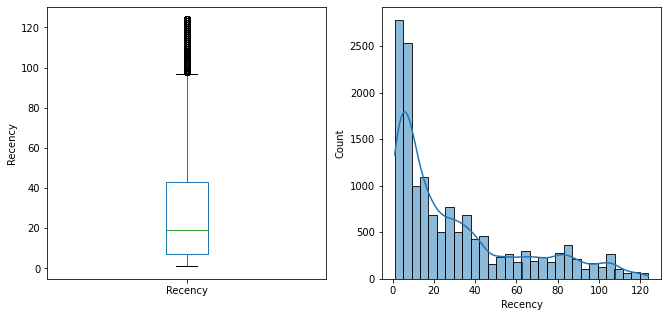

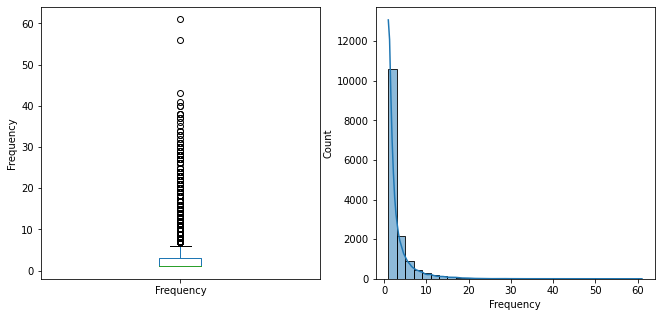

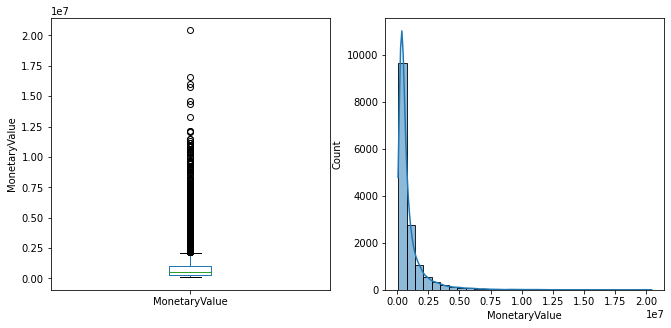

In [31]:
for var in ["Recency","Frequency","MonetaryValue"]:
    plt.figure(figsize=(11,5))
    plt.subplot(1, 2, 1)
    fig = rfm_customer.boxplot(column=var,grid=False)
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig=sns.histplot(rfm_customer[var], kde=True,bins=30)
    fig.set_xlabel(var)

    plt.show()

- we have highly skewed variables

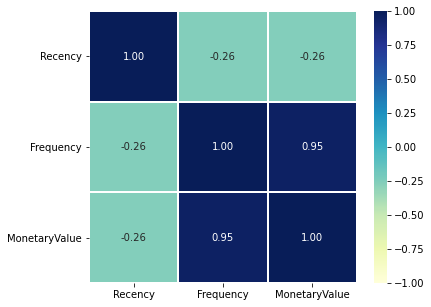

In [32]:
plt.figure(figsize=(6,5))
s = sns.heatmap(rfm_customer.corr(),cmap = "YlGnBu",annot=True,fmt=".2f",linewidths=2,vmin=-1, vmax=1)
s.set_yticklabels(s.get_yticklabels(),rotation=0)
plt.show()

- Frequency and MonetaryValue are highly correlated


- better to use PCA for create uncorrelated variables

In [33]:
rfm_customer.describe()

,Recency,Frequency,MonetaryValue
count,14964.000,14964.000,14964.000
mean,30.498,2.709,944894.413
std,30.833,3.425,1217562.738
min,1.000,1.000,80000.000
25%,7.000,1.000,320000.000
50%,19.000,1.000,520000.000
75%,43.000,3.000,1040000.000
max,124.000,61.000,20420000.000


In [34]:
#Scale features
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaled_data = pd.DataFrame(scaler.fit_transform(rfm_customer), 
                           columns = rfm_customer.columns, 
                           index = rfm_customer.index)

scaled_data.head(10)

,Recency,Frequency,MonetaryValue
customer_id,,,
5.94687E+23,-0.278,0.500,0.222
5.94772E+23,1.250,0.000,0.111
5.94773E+23,-0.278,2.000,1.639
5.95E+25,-0.389,0.000,-0.278
58a4b0e452faff000179dbd0,-0.333,3.000,1.333
58a56a6b52faff00013072d8,0.500,1.500,0.972
58a56f7452faff0001307334,1.500,0.500,0.722
58a583d552faff000130744c,0.361,0.000,-0.472
58a717b552faff0001c6b661,-0.333,0.000,-0.472


### K-Means Clustering based on PCA

In [35]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(scaled_data)

PCA()

In [36]:
pca.explained_variance_ratio_

array([0.87326471, 0.10356658, 0.02316871])

#### Check Number of Components

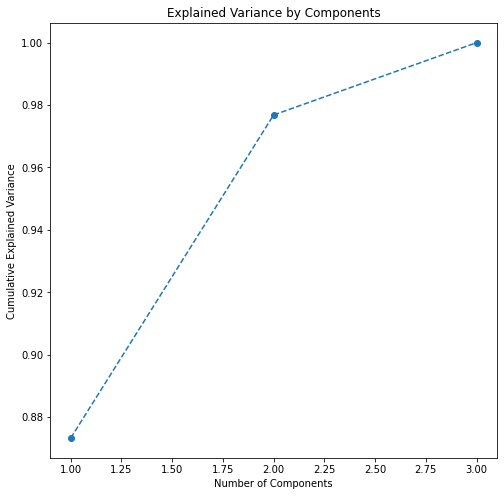

In [37]:
plt.figure(figsize=(8,8))
plt.plot(range(1,4),pca.explained_variance_ratio_.cumsum(),marker="o",linestyle="--")
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

scores_pca = pca.fit_transform(scaled_data)

### Check Correlation Between Components and Original Variable

In [39]:
data_pca = pd.DataFrame(data=pca.components_,columns=rfm_customer.columns,index=["PC1","PC2"])
data_pca

,Recency,Frequency,MonetaryValue
PC1,-0.107,0.708,0.698
PC2,0.994,0.076,0.075


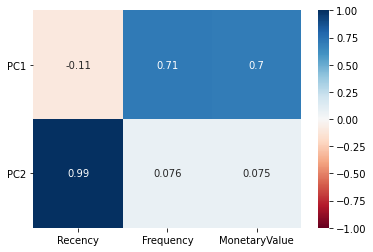

In [40]:
s=sns.heatmap(data_pca,annot=True,cmap="RdBu",vmin=-1,vmax=1)
s.set_yticklabels(s.get_yticklabels(),rotation=0)
plt.show()

### practical k-means clustering

### Key steps

-  Data pre-processing

-  Choosing a number of clusters

-  Running k-means clustering on pre-processed data

-  Analyzing average RFM values of each cluster

### Methods to define the number of clusters

-  Visual methods - elbow criterion

-  Mathematical methods - silhouette coefficient

-  Experimentation and interpretation

### Elbow Criterion Method for K-Means

In [41]:
from sklearn.cluster import KMeans

# Fit KMeans and calculate SSE for each k
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, init = "k-means++", random_state = 1234,n_init=10,max_iter=300)
    kmeans.fit(scores_pca)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center

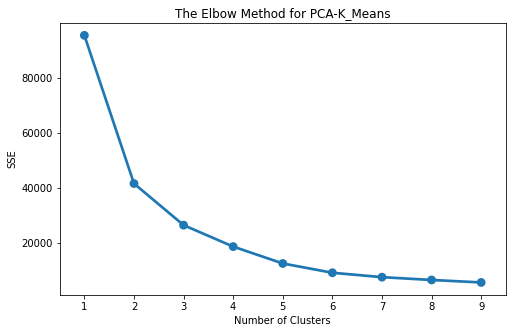

In [42]:
# Plot SSE for each k
plt.figure(figsize=(8,5))
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.title("The Elbow Method for PCA-K_Means")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [43]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5,init = "k-means++", random_state = 123,n_init=10,max_iter=300)
kmeans.fit(scores_pca)

KMeans(n_clusters=5, random_state=123)

### silhouette Criterion Method for PCA K-Means

In [44]:
from sklearn.metrics import silhouette_score
print(silhouette_score(scores_pca, kmeans.labels_, metric="euclidean"))

0.5253920625889141


In [45]:
rfm_customer = rfm_customer.reset_index()
rfm_customer_pca_kmeans = pd.concat([rfm_customer,pd.DataFrame(scores_pca)],axis=1)
rfm_customer_pca_kmeans.head()

,customer_id,Recency,Frequency,MonetaryValue,0,1
0,5.94687E+23,9,2,680000.000,-0.444,-0.648
1,5.94772E+23,64,1,600000.000,-1.039,0.824
2,5.94773E+23,9,5,1700000.000,1.607,-0.428
3,5.95E+25,5,1,320000.000,-1.135,-0.835
4,58a4b0e452faff000179dbd0,7,7,1480000.000,2.107,-0.430


In [46]:
rfm_customer_pca_kmeans = rfm_customer_pca_kmeans.rename(columns={0:"PC1",1:"PC2"})
rfm_customer_pca_kmeans.head()

,customer_id,Recency,Frequency,MonetaryValue,PC1,PC2
0,5.94687E+23,9,2,680000.000,-0.444,-0.648
1,5.94772E+23,64,1,600000.000,-1.039,0.824
2,5.94773E+23,9,5,1700000.000,1.607,-0.428
3,5.95E+25,5,1,320000.000,-1.135,-0.835
4,58a4b0e452faff000179dbd0,7,7,1480000.000,2.107,-0.430


In [47]:
rfm_customer_pca_kmeans["segment k-means"] = kmeans.predict(scores_pca)
rfm_customer_pca_kmeans.head(10)

,customer_id,Recency,Frequency,MonetaryValue,PC1,PC2,segment k-means
0,5.94687E+23,9,2,680000.000,-0.444,-0.648,4
1,5.94772E+23,64,1,600000.000,-1.039,0.824,3
2,5.94773E+23,9,5,1700000.000,1.607,-0.428,0
3,5.95E+25,5,1,320000.000,-1.135,-0.835,4
4,58a4b0e452faff000179dbd0,7,7,1480000.000,2.107,-0.430,0
5,58a56a6b52faff00013072d8,37,4,1220000.000,0.704,0.257,0
6,58a56f7452faff0001307334,73,2,1040000.000,-0.285,1.157,3
7,58a583d552faff000130744c,32,1,180000.000,-1.351,-0.104,4
8,58a717b552faff0001c6b661,7,1,180000.000,-1.277,-0.794,4
9,58a8558352faff000139b647,3,1,460000.000,-0.993,-0.875,4


In [48]:
rfm_customer_analysis = rfm_customer_pca_kmeans[["Recency","Frequency","MonetaryValue","segment k-means"]].groupby(["segment k-means"]).mean()
rfm_customer_analysis

,Recency,Frequency,MonetaryValue
segment k-means,,,
0,13.732,5.277,1846797.945
1,10.739,25.441,9042342.342
2,9.848,12.139,4302835.821
3,80.827,1.252,421596.358
4,17.561,1.535,531983.162


- cluster 0:Needs to attention


- cluster 1:Champion


- cluster 2:Loyal


- cluster 3:Loose


- cluster 4:About to sleep

In [49]:
rfm_customer_pca_kmeans["Labels"] = rfm_customer_pca_kmeans["segment k-means"].replace({0:"Needs to attention",
                                                                                1:"Champion",
                                                                                2:"Loyal",
                                                                                3:"Loose",
                                                                                4:"About to sleep"})
rfm_customer_pca_kmeans

,customer_id,Recency,Frequency,MonetaryValue,PC1,PC2,segment k-means,Labels
0,5.94687E+23,9,2,680000.000,-0.444,-0.648,4,About to sleep
1,5.94772E+23,64,1,600000.000,-1.039,0.824,3,Loose
2,5.94773E+23,9,5,1700000.000,1.607,-0.428,0,Needs to attention
3,5.95E+25,5,1,320000.000,-1.135,-0.835,4,About to sleep
4,58a4b0e452faff000179dbd0,7,7,1480000.000,2.107,-0.430,0,Needs to attention
...,...,...,...,...,...,...,...,...
14959,5d3584f8b2cf38d2d17aafba,1,1,200000.000,-1.239,-0.958,4,About to sleep
14960,5d359600b2cf38d2d17ac0e7,1,1,520000.000,-0.929,-0.924,4,About to sleep
14961,5d35a06bb2cf38d2d17acbc3,1,1,440000.000,-1.007,-0.933,4,About to sleep
14962,5d35ae07b2cf38d2d17adb54,1,1,200000.000,-1.239,-0.958,4,About to sleep


In [50]:
rfm_customer_pca_kmeans["Labels"].value_counts(normalize=True)

About to sleep       0.572
Loose                0.220
Needs to attention   0.156
Loyal                0.045
Champion             0.007
Name: Labels, dtype: float64

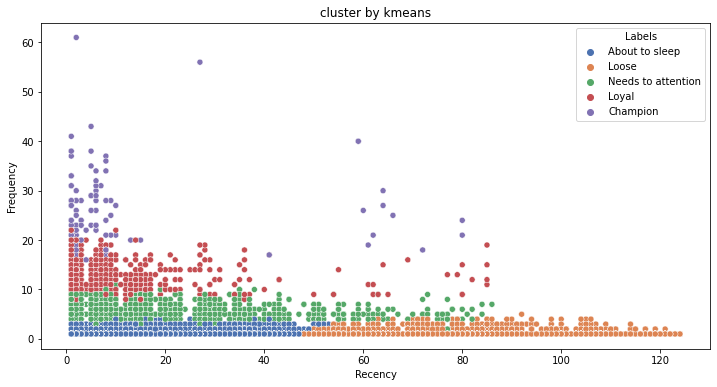

In [51]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=rfm_customer_pca_kmeans["Recency"],y=rfm_customer_pca_kmeans["Frequency"],
                hue=rfm_customer_pca_kmeans["Labels"], palette="deep")
               
plt.title("cluster by kmeans")
plt.show()

### Relative importance of segment attributes

- Useful technique to identify relative importance of each segment's attribute


- Calculate average values of each cluster


- Calculate average values of population


- Calculate importance score by dividing them and subtracting 1 (ensures 0 is returned when cluster average equals population average)


In [52]:
cluster_avg = rfm_customer_pca_kmeans[["Recency","Frequency","MonetaryValue","segment k-means"]].groupby(["segment k-means"]).mean()

In [53]:
population_avg = rfm_customer.mean()

In [54]:
relative_imp = cluster_avg / population_avg - 1

In [55]:
relative_imp.round(2)

,Recency,Frequency,MonetaryValue
segment k-means,,,
0,-0.550,0.950,0.950
1,-0.650,8.390,8.570
2,-0.680,3.480,3.550
3,1.650,-0.540,-0.550
4,-0.420,-0.430,-0.440


In [56]:
relative_imp = relative_imp.rename({0:"Needs to attention",
                                    1:"Champion",
                                    2:"Loyal",
                                    3:"Loose",
                                    4:"About to sleep"})

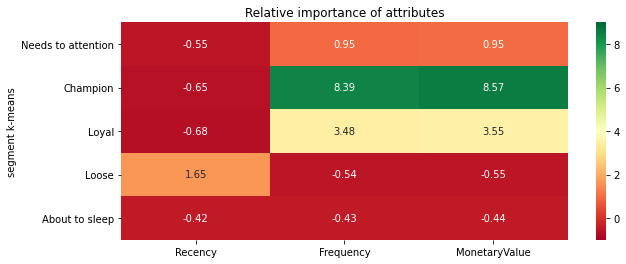

In [57]:
# Plot heatmap
plt.figure(figsize=(10,4))
plt.title("Relative importance of attributes")
s= sns.heatmap(data=relative_imp, annot=True, fmt=".2f", cmap="RdYlGn",vmin =-1 ,vmax = 9)
s.set_yticklabels(s.get_yticklabels(),rotation=0)
plt.show()

#### As a ratio moves away from 0, attribute importance for a segment (relative to total pop) increases.


# End of code